In [2]:
import pandas as pd

### Loading Data

In [11]:
df = pd.read_csv(r'C:\Users\f2674955\OneDrive - FRG\Desktop\Individual Project\Avocado_HassAvocadoBoard_20152023v1.0.1.csv')

In [12]:
df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


### Data Clean up

In [14]:
# Remove duplicate rows
data_cleaned = df.drop_duplicates()

In [16]:
data_cleaned.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


### Handling missing values

In [17]:
# Handle missing values
# Fill missing values in 'SmallBags', 'LargeBags', and 'XLargeBags' with the mean of the respective columns
data_cleaned['SmallBags'].fillna(data_cleaned['SmallBags'].mean(), inplace=True)
data_cleaned['LargeBags'].fillna(data_cleaned['LargeBags'].mean(), inplace=True)
data_cleaned['XLargeBags'].fillna(data_cleaned['XLargeBags'].mean(), inplace=True)

### Converting Date to datetime type

In [18]:
# Convert 'Date' column to datetime type
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

### Saving the cleaned data to a new CSV file

In [19]:
# Save the cleaned data to a new CSV file
cleaned_file_path = 'Avocado_HassAvocadoBoard_Cleaned.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

In [20]:
# Load the cleaned data from the new CSV file
cleaned_file_path = 'Avocado_HassAvocadoBoard_Cleaned.csv'
cleaned_data = pd.read_csv(cleaned_file_path)

# Display the first few rows of the cleaned data to verify
print(cleaned_data.head())

         Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0  2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1  2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2  2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3  2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4  2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   

   TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0    9716.46    9186.93     529.53         0.0  conventional   
1    1162.65    1162.65       0.00         0.0       organic   
2   46815.79   16707.15   30108.64         0.0  conventional   
3    1408.19    1071.35     336.84         0.0       organic   
4  141136.68  137146.07    3990.61         0.0  conventional   

                region  
0               Albany  
1               Albany  
2              Atlanta  
3              Atlanta  
4  BaltimoreWashington  


## Exploratory Data Analysis

In [10]:
import seaborn as sns #This imports the seaborn library, which is used for statistical data visualization. It is built on top of matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics. The alias sns is a shorthand reference to seaborn.
from matplotlib import pyplot as plt #This imports the pyplot module from the matplotlib library, which is used for creating static, animated, and interactive visualizations in Python. The alias plt is a shorthand reference to pyplot.
import datetime as dt #This imports the datetime module, which supplies classes for manipulating dates and times. The alias dt is a shorthand reference to datetime.
import os 

### Statistical Summary for Numeric tables

In [21]:
summary_statistics = cleaned_data.describe()
print(summary_statistics)

       AveragePrice   TotalVolume       plu4046       plu4225       plu4770  \
count  53415.000000  5.341500e+04  5.341500e+04  5.341500e+04  5.341500e+04   
mean       1.428910  8.694474e+05  2.982707e+05  2.222170e+05  2.053195e+04   
std        0.393116  3.545274e+06  1.307669e+06  9.554624e+05  1.040977e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.119091  1.626465e+04  6.947250e+02  2.120800e+03  0.000000e+00   
50%        1.400000  1.203525e+05  1.458058e+04  1.751663e+04  9.005000e+01   
75%        1.690000  4.542380e+05  1.287924e+05  9.351560e+04  3.599735e+03   
max        3.440830  6.103446e+07  2.544720e+07  2.047057e+07  2.860025e+06   

          TotalBags     SmallBags     LargeBags     XLargeBags  
count  5.341500e+04  5.341500e+04  5.341500e+04   53415.000000  
mean   2.175083e+05  1.039222e+05  2.331316e+04    2731.811796  
std    8.676947e+05  4.988876e+05  1.311607e+05   19796.586439  
min    0.000000e+00  0.00000

### Correlation Matrix

In [22]:
correlation_matrix = cleaned_data.corr()
print(correlation_matrix)

              AveragePrice  TotalVolume   plu4046   plu4225   plu4770  \
AveragePrice      1.000000    -0.179153 -0.184299 -0.155367 -0.143928   
TotalVolume      -0.179153     1.000000  0.966413  0.930966  0.817264   
plu4046          -0.184299     0.966413  1.000000  0.880644  0.828545   
plu4225          -0.155367     0.930966  0.880644  1.000000  0.803806   
plu4770          -0.143928     0.817264  0.828545  0.803806  1.000000   
TotalBags        -0.166318     0.965620  0.920839  0.893413  0.775465   
SmallBags        -0.120496     0.618233  0.543405  0.657848  0.479476   
LargeBags        -0.112452     0.513270  0.476182  0.598752  0.438853   
XLargeBags       -0.090865     0.472826  0.383456  0.410860  0.322093   

              TotalBags  SmallBags  LargeBags  XLargeBags  
AveragePrice  -0.166318  -0.120496  -0.112452   -0.090865  
TotalVolume    0.965620   0.618233   0.513270    0.472826  
plu4046        0.920839   0.543405   0.476182    0.383456  
plu4225        0.893413   0.6

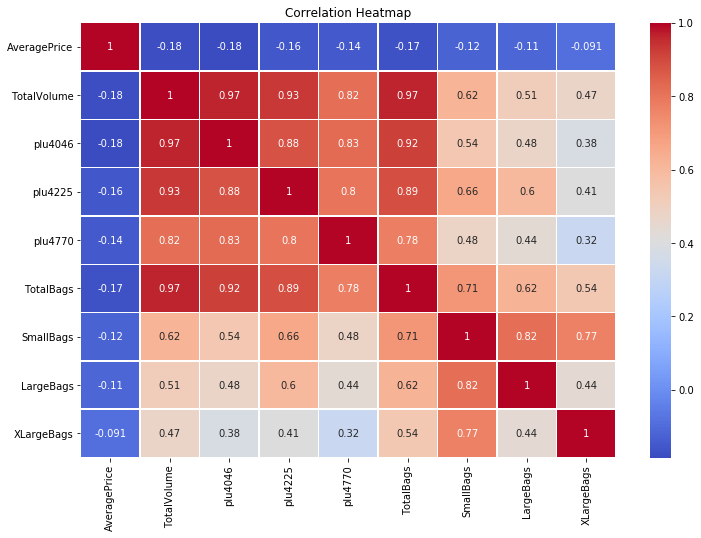

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

###Distribution of Average Price

In [23]:
average_price_distribution = cleaned_data['AveragePrice'].describe()
print(average_price_distribution)

count    53415.000000
mean         1.428910
std          0.393116
min          0.440000
25%          1.119091
50%          1.400000
75%          1.690000
max          3.440830
Name: AveragePrice, dtype: float64


### Distribution of Total Volume

In [24]:
total_volume_distribution = cleaned_data['TotalVolume'].describe()
print(total_volume_distribution)

count    5.341500e+04
mean     8.694474e+05
std      3.545274e+06
min      8.456000e+01
25%      1.626465e+04
50%      1.203525e+05
75%      4.542380e+05
max      6.103446e+07
Name: TotalVolume, dtype: float64


### Distribution of Sales by Type (Conventional vs Organic)

In [25]:
sales_by_type = cleaned_data['type'].value_counts()
print(sales_by_type)

conventional    26709
organic         26706
Name: type, dtype: int64


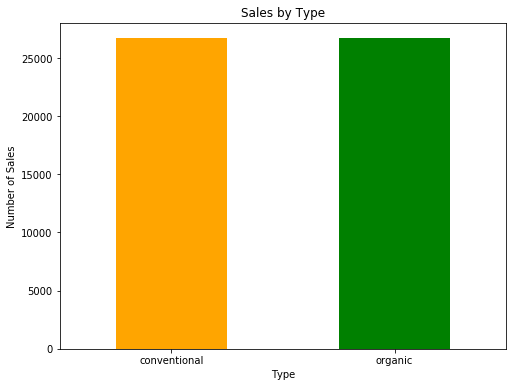

In [31]:
sales_by_type = cleaned_data['type'].value_counts()

plt.figure(figsize=(8, 6))
sales_by_type.plot(kind='bar', color=['orange', 'green'])
plt.title('Sales by Type')
plt.xlabel('Type')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)
plt.show()

### Distribution of Sales by Region

In [26]:
sales_by_region = cleaned_data['region'].value_counts()
print(sales_by_region)

Albany                  932
PhoenixTucson           932
Pittsburgh              932
Seattle                 932
Orlando                 932
Northeast               932
Portland                932
Indianapolis            932
TotalUS                 932
West                    932
Tampa                   932
Sacramento              932
DallasFtWorth           932
GrandRapids             932
Houston                 932
Chicago                 932
Detroit                 932
LosAngeles              932
Spokane                 932
NewYork                 932
Denver                  932
Southeast               932
Roanoke                 932
Philadelphia            932
SanDiego                932
NorthernNewEngland      932
California              932
Nashville               932
Charlotte               932
Jacksonville            932
HartfordSpringfield     932
CincinnatiDayton        932
Atlanta                 932
SouthCentral            932
NewOrleans              932
BuffaloRochester    

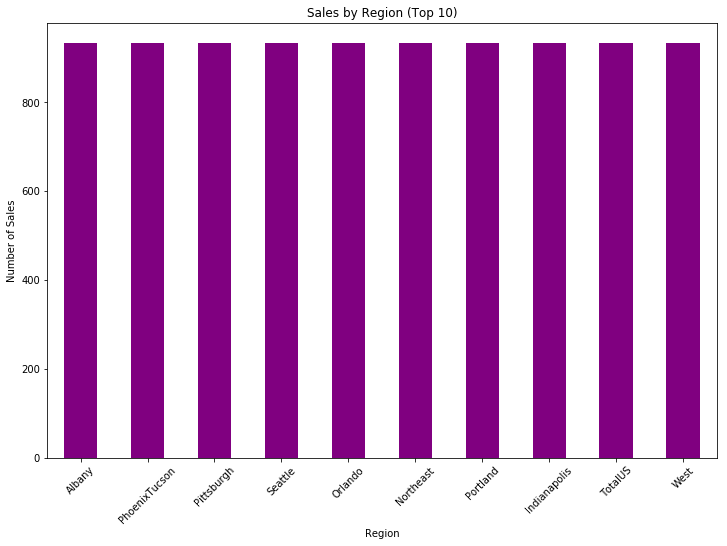

In [30]:
sales_by_region = cleaned_data['region'].value_counts().head(10)  # Top 10 regions for simplicity

plt.figure(figsize=(12, 8))
sales_by_region.plot(kind='bar', color='purple')
plt.title('Sales by Region (Top 10)')
plt.xlabel('Region')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

### Time Series Analysis of Average Price Over Time

In [27]:
average_price_time_series = cleaned_data.groupby('Date')['AveragePrice'].mean()
print(average_price_time_series)

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
2015-02-08    1.310463
2015-02-15    1.387593
2015-02-22    1.362685
2015-03-01    1.311019
2015-03-08    1.360093
2015-03-15    1.391944
2015-03-22    1.349259
2015-03-29    1.397593
2015-04-05    1.412963
2015-04-12    1.363981
2015-04-19    1.371667
2015-04-26    1.385185
2015-05-03    1.283889
2015-05-10    1.323519
2015-05-17    1.353148
2015-05-24    1.380463
2015-05-31    1.382407
2015-06-07    1.380926
2015-06-14    1.400463
2015-06-21    1.408426
2015-06-28    1.406481
2015-07-05    1.413796
2015-07-12    1.415648
2015-07-19    1.387500
2015-07-26    1.420833
                ...   
2023-05-14    1.299919
2023-05-21    1.319792
2023-05-28    1.313820
2023-06-04    1.329818
2023-06-11    1.321696
2023-06-18    1.346879
2023-06-25    1.376927
2023-07-02    1.401609
2023-07-09    1.423337
2023-07-16    1.452736
2023-07-23    1.488454
2023-07-30    1.497120
2023-0

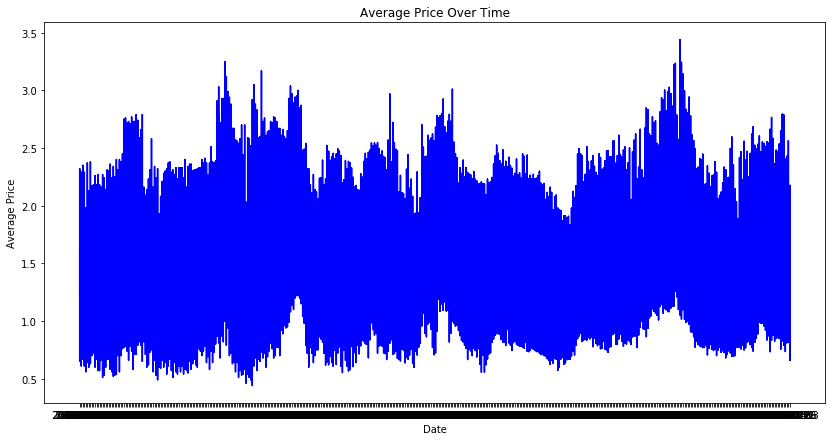

In [32]:
plt.figure(figsize=(14, 7))
plt.plot(cleaned_data['Date'], cleaned_data['AveragePrice'], color='blue')
plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

### Time Series Analysis of Total Volume Over Time

In [28]:
total_volume_time_series = cleaned_data.groupby('Date')['TotalVolume'].sum()
print(total_volume_time_series)

Date
2015-01-04    8.467434e+07
2015-01-11    7.855581e+07
2015-01-18    7.838878e+07
2015-01-25    7.646628e+07
2015-02-01    1.194532e+08
2015-02-08    8.667111e+07
2015-02-15    7.563716e+07
2015-02-22    8.087609e+07
2015-03-01    8.943484e+07
2015-03-08    8.128167e+07
2015-03-15    7.967682e+07
2015-03-22    8.734632e+07
2015-03-29    8.084341e+07
2015-04-05    8.474308e+07
2015-04-12    8.641070e+07
2015-04-19    8.917629e+07
2015-04-26    8.381432e+07
2015-05-03    1.117918e+08
2015-05-10    9.887386e+07
2015-05-17    8.637699e+07
2015-05-24    9.534623e+07
2015-05-31    9.139512e+07
2015-06-07    9.845828e+07
2015-06-14    9.975368e+07
2015-06-21    9.634213e+07
2015-06-28    8.727265e+07
2015-07-05    1.020970e+08
2015-07-12    8.515795e+07
2015-07-19    8.713661e+07
2015-07-26    8.231034e+07
                  ...     
2023-05-14    1.157960e+08
2023-05-21    1.148664e+08
2023-05-28    1.139554e+08
2023-06-04    1.165966e+08
2023-06-11    1.125669e+08
2023-06-18    1.110754e

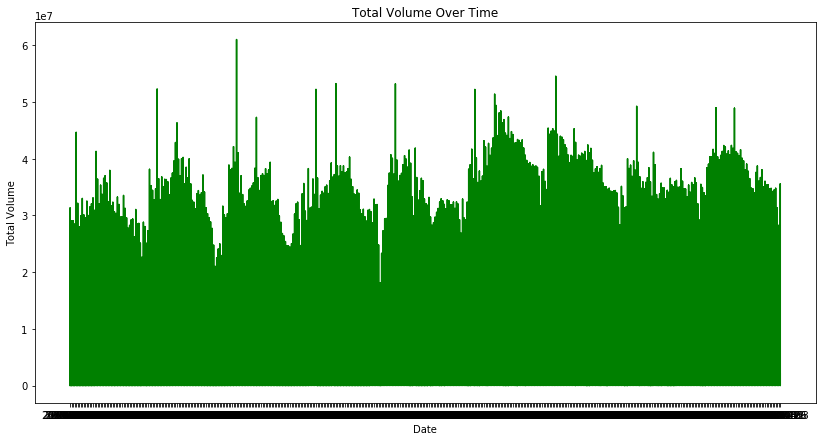

In [33]:
plt.figure(figsize=(14, 7))
plt.plot(cleaned_data['Date'], cleaned_data['TotalVolume'], color='green')
plt.title('Total Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.show()

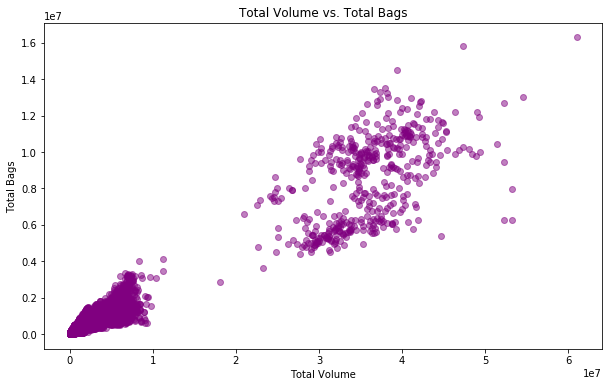

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['TotalVolume'], cleaned_data['TotalBags'], alpha=0.5, color='purple')
plt.title('Total Volume vs. Total Bags')
plt.xlabel('Total Volume')
plt.ylabel('Total Bags')
plt.show()

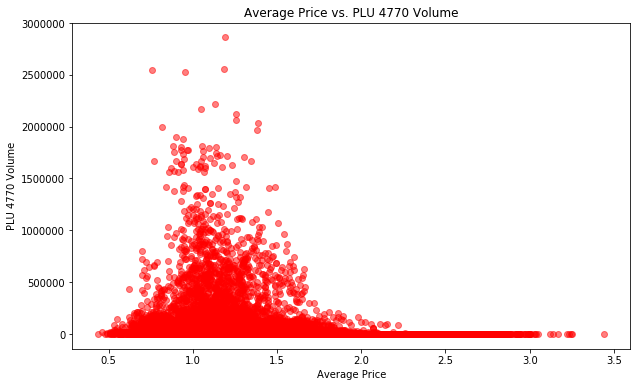

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['AveragePrice'], cleaned_data['plu4770'], alpha=0.5, color='red')
plt.title('Average Price vs. PLU 4770 Volume')
plt.xlabel('Average Price')
plt.ylabel('PLU 4770 Volume')
plt.show()

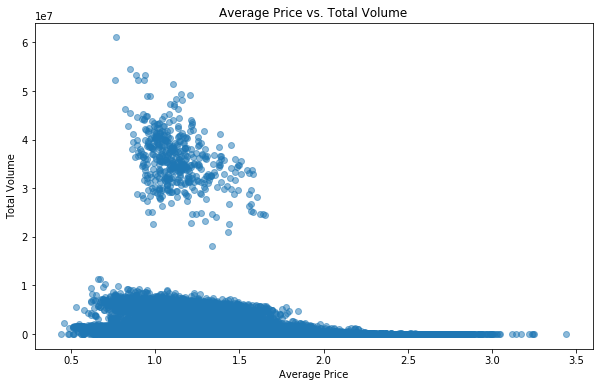

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['AveragePrice'], cleaned_data['TotalVolume'], alpha=0.5)
plt.title('Average Price vs. Total Volume')
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.show()